<a href="https://colab.research.google.com/github/harene634/Detection-of-peacock-in-crop-field/blob/main/Detection_of_peacock_in_crop_field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x_train=train_datagen.flow_from_directory("/content/drive/MyDrive/peaimg1", target_size=(64,64),batch_size=64,class_mode="categorical")
x_test=test_datagen.flow_from_directory("/content/drive/MyDrive/peacocktest",
                                          target_size=(64,64),batch_size=64,class_mode="categorical")

Found 182 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [ ]:
print(x_train.class_indices)

{'non peacock img': 0, 'peacock img': 1}


In [ ]:
model=Sequential()

In [ ]:
#adding convolution layer(no.of filters,filter size,input shape,activation function)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [ ]:
#adding max pooling layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#input layer of ann
model.add(Flatten())

In [ ]:
#add hidden layer(no.of neurons,activation=relu,weights)
model.add(Dense(units=128,activation="relu"))

In [ ]:
#add output layer(no.of output classes=5,activation function=softmax)
model.add(Dense(units=2,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 3,937,538
Trainable params: 3,937,538
Non-trainable params: 0
______________________________________________

In [ ]:
#configure the learning process(loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.save("peacock.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model=load_model("peacock.h5")

OSError: ignored

In [ ]:

img=image.load_img("/content/drive/MyDrive/peacock img/046RZ226OR0U.jpg",target_size=(64,64))

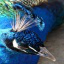

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[124., 210., 175.],
        [107., 209., 162.],
        [ 80., 183., 128.],
        ...,
        [ 61.,  61.,  73.],
        [ 63.,  61.,  74.],
        [ 56.,  58.,  70.]],

       [[135., 203., 178.],
        [120., 196., 157.],
        [127., 210., 156.],
        ...,
        [ 52.,  54.,  66.],
        [ 58.,  60.,  72.],
        [ 59.,  66.,  76.]],

       [[182., 228., 199.],
        [178., 226., 186.],
        [172., 232., 178.],
        ...,
        [ 39.,  43.,  54.],
        [ 48.,  54.,  66.],
        [ 60.,  68.,  79.]],

       ...,

       [[ 14.,  79., 171.],
        [ 21.,  91., 177.],
        [ 18.,  91., 168.],
        ...,
        [112., 108., 107.],
        [119., 115., 114.],
        [114., 110., 107.]],

       [[ 26.,  91., 181.],
        [ 28.,  93., 177.],
        [  2.,  68., 144.],
        ...,
        [112., 107., 103.],
        [119., 116., 109.],
        [118., 115., 108.]],

       [[ 21.,  90., 165.],
        [  0.,  63., 135.],
        [  0.,  

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x.shape

(1, 64, 64, 3)

In [ ]:
y=model.predict(x)
pred=np.argmax(y, axis=1)

1/1 [==============================] - 0s 154ms/step


In [ ]:
y

array([[8.416834e-04, 9.991584e-01]], dtype=float32)

In [ ]:
pred

array([1])

In [ ]:
x_train.class_indices

{'non peacock img': 0, 'peacock img': 1}